# Importing and reading image names from train to a list

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
labels=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models

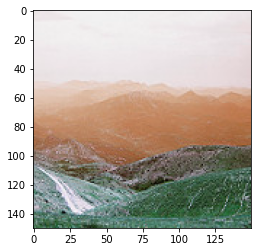

In [6]:
import os
import cv2
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models

filePath='./train/'
labels=pd.read_csv('./train.csv')
imList=[]
i=0
# get the path/directory
folder_dir = "./train/"
for image in labels['image_name']:
    im=cv2.imread(folder_dir+image)
    imList.append(im)
plt.imshow(imList[25])

# Testing to see if labels match images read in

In [7]:
#0=Buildings
#1= Forest
#2= Mountains
#3=Glaciers
#4=Sea
#5=Street
print(labels.head(5))
imList[0]



  image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4


array([[[243, 248, 247],
        [243, 248, 247],
        [244, 249, 248],
        ...,
        [246, 248, 248],
        [246, 248, 248],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [246, 248, 248],
        [245, 247, 247],
        [245, 247, 247]],

       [[244, 246, 246],
        [244, 246, 246],
        [245, 247, 247],
        ...,
        [246, 248, 248],
        [245, 247, 247],
        [245, 247, 247]],

       ...,

       [[ 46,  48,  49],
        [ 57,  59,  60],
        [ 44,  46,  47],
        ...,
        [ 39,  42,  47],
        [ 36,  39,  44],
        [ 88,  91,  96]],

       [[ 71,  73,  74],
        [ 45,  47,  48],
        [ 41,  43,  44],
        ...,
        [ 18,  21,  26],
        [ 47,  50,  55],
        [ 32,  35,  40]],

       [[ 58,  59,  63],
        [ 52,  53,  57],
        [ 55,  56,  60],
        ...,
        [ 25,  25,  31],
        [ 45,  45,  51],
        [ 58,  58,  64]]

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [7]:
kernel=(3,3)
model = models.Sequential()
model.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



ModuleNotFoundError: No module named 'keras'

# Spliting data between training and validation

In [9]:
from sklearn.model_selection import train_test_split
X=labels['image_name'].tolist()
y=labels['label'].astype(str).tolist()
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
train=pd.DataFrame(X_train,y_train)
train.reset_index(inplace=True)
train = train.rename(columns = {'index':'label'})
train = train.rename(columns = {0:'image_name'})
print(train)

valid=pd.DataFrame(X_valid,y_valid)
valid.reset_index(inplace=True)
valid = valid.rename(columns = {'index':'label'})
valid = valid.rename(columns = {0:'image_name'})
valid


      label image_name
0         3   5836.jpg
1         1  20400.jpg
2         2   7996.jpg
3         0  14297.jpg
4         0  22776.jpg
...     ...        ...
12770     3   5917.jpg
12771     1   8034.jpg
12772     2   6628.jpg
12773     1  16124.jpg
12774     3  11864.jpg

[12775 rows x 2 columns]


,label,image_name
0,3,17004.jpg
1,1,9078.jpg
2,3,7416.jpg
3,4,6834.jpg
4,0,8964.jpg
...,...,...
4254,2,13354.jpg
4255,3,12477.jpg
4256,5,6264.jpg
4257,2,7402.jpg


# Reading in training data and validation with an image Genrator

In [10]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen=image.ImageDataGenerator(rescale=1./255)
labels.label=labels.label.astype(str)
train_gen=datagen.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))



Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.


In [5]:
from sklearn.model_selection import train_test_split
X=imList
y=labels['label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y)

NameError: name 'imList' is not defined

# One Convultion Model With no image manipulation

In [82]:

from PIL import Image

history = modelN.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 15s 22ms/step - loss: 1.4377 - categorical_accuracy: 0.6005 - val_loss: 1.0874 - val_categorical_accuracy: 0.5600
Epoch 2/20
639/639 [==============================] - 13s 21ms/step - loss: 0.5764 - categorical_accuracy: 0.8016 - val_loss: 0.8538 - val_categorical_accuracy: 0.7000
Epoch 3/20
639/639 [==============================] - 14s 22ms/step - loss: 0.3283 - categorical_accuracy: 0.8931 - val_loss: 1.5200 - val_categorical_accuracy: 0.6200
Epoch 4/20
639/639 [==============================] - 14s 22ms/step - loss: 0.2060 - categorical_accuracy: 0.9371 - val_loss: 1.2267 - val_categorical_accuracy: 0.6800
Epoch 5/20
639/639 [==============================] - 13s 21ms/step - loss: 0.1399 - categorical_accuracy: 0.9591 - val_loss: 1.5614 - val_categorical_accuracy: 0.7000
Epoch 6/20
639/639 [==============================] - 14s 21ms/step - loss: 0.2326 - categorical_accuracy: 0.9317 - val_loss: 2.7897 - val_categorical_accuracy:

In [58]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [85]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

# Plot Comparing train accuracy and validation accuracy

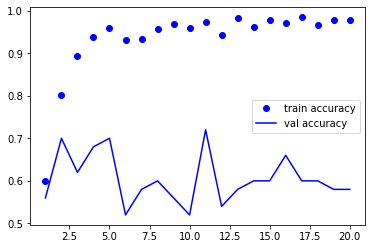

In [86]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

# Plot Comparing train and validation loss

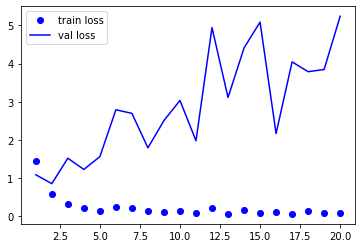

In [89]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

By looking as these two graphs it is quite obvious that overfitting is present as the training accuacy gets much better and validation accuracy gets worse

# using ImageDataGenerator modifiers to see if this helps with overfitting

In [1]:

folder_dir = "./train/"
datagen=image.ImageDataGenerator(rescale=1./255)
datagen_train=image.ImageDataGenerator(rescale=1./255,
                                      zoom_range=.3,
                                      shear_range=.3,
                                      rotation_range=.3
                                     )
labels.label=labels.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))




NameError: name 'image' is not defined

# One Convulution layer with ImageDataGen Modifiers

In [ ]:
kernel=(5,5)
modelN = models.Sequential()
modelN.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))

modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelN.add(layers.Flatten())


modelN.add(layers.Dense(6, activation='softmax'))

modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [32]:
history3 = modelN.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 70s 115ms/step - loss: 1.5897 - categorical_accuracy: 0.5318 - val_loss: 1.6679 - val_categorical_accuracy: 0.4600
Epoch 2/20
600/600 [==============================] - 69s 116ms/step - loss: 1.2415 - categorical_accuracy: 0.5707 - val_loss: 1.3733 - val_categorical_accuracy: 0.5000
Epoch 3/20
600/600 [==============================] - 70s 117ms/step - loss: 1.3068 - categorical_accuracy: 0.5727 - val_loss: 1.5557 - val_categorical_accuracy: 0.6400
Epoch 4/20
600/600 [==============================] - 71s 119ms/step - loss: 1.2187 - categorical_accuracy: 0.6053 - val_loss: 1.2596 - val_categorical_accuracy: 0.5800
Epoch 5/20
600/600 [==============================] - 70s 117ms/step - loss: 1.2206 - categorical_accuracy: 0.6078 - val_loss: 1.3755 - val_categorical_accuracy: 0.5800
Epoch 6/20
600/600 [==============================] - 71s 118ms/step - loss: 1.3113 - categorical_accuracy: 0.5992 - val_loss: 1.9371 - val_categorical_acc

In [40]:
acc=history2.history['categorical_accuracy']
val_acc=history2.history['val_categorical_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

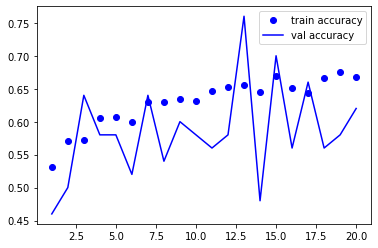

In [41]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

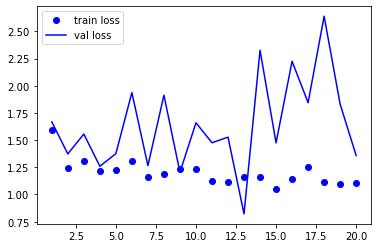

In [42]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

# Making a model that makes uses 2 convolutions with DataGen modifiers

In [7]:
kernel=(5,5)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel, padding='same',input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())


model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1051404   
Total params: 1,105,100
Trainable params: 1,105,100
Non-trainable params: 0
____________________________________________

In [45]:
history3 = model2.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 69s 114ms/step - loss: 1.1995 - categorical_accuracy: 0.5778 - val_loss: 1.2067 - val_categorical_accuracy: 0.6200
Epoch 2/20
600/600 [==============================] - 70s 116ms/step - loss: 0.9754 - categorical_accuracy: 0.6514 - val_loss: 1.0223 - val_categorical_accuracy: 0.7200
Epoch 3/20
600/600 [==============================] - 69s 115ms/step - loss: 0.9210 - categorical_accuracy: 0.6729 - val_loss: 1.5476 - val_categorical_accuracy: 0.4400
Epoch 4/20
600/600 [==============================] - 69s 114ms/step - loss: 0.9208 - categorical_accuracy: 0.6796 - val_loss: 0.9010 - val_categorical_accuracy: 0.6400
Epoch 5/20
600/600 [==============================] - 71s 119ms/step - loss: 0.8878 - categorical_accuracy: 0.7030 - val_loss: 1.2419 - val_categorical_accuracy: 0.7000
Epoch 6/20
600/600 [==============================] - 72s 121ms/step - loss: 0.8354 - categorical_accuracy: 0.7144 - val_loss: 1.3800 - val_categorical_acc

In [49]:
acc=history3.history['categorical_accuracy']
val_acc=history3.history['val_categorical_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

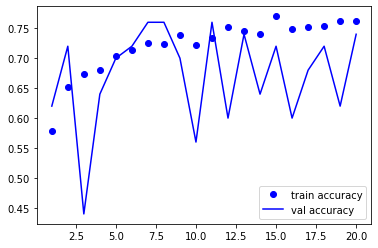

In [50]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

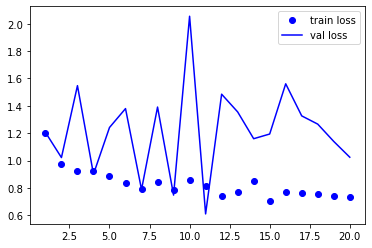

In [51]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

# Using a model that uses 3 Convolutions With dataGen modifiers

In [61]:
kernel=(5,5)
model3 = models.Sequential()
model3.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(64, kernel, padding='same',input_shape=(150,150,3)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(128, kernel, padding='same',input_shape=(150,150,3)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(6, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [62]:
history4 = model3.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 25s 40ms/step - loss: 1.0620 - categorical_accuracy: 0.6113 - val_loss: 0.7820 - val_categorical_accuracy: 0.5800
Epoch 2/20
600/600 [==============================] - 24s 40ms/step - loss: 0.8297 - categorical_accuracy: 0.7092 - val_loss: 1.0418 - val_categorical_accuracy: 0.6800
Epoch 3/20
600/600 [==============================] - 23s 39ms/step - loss: 11.7600 - categorical_accuracy: 0.7092 - val_loss: 2.4548 - val_categorical_accuracy: 0.8200
Epoch 4/20
600/600 [==============================] - 24s 39ms/step - loss: 0.7184 - categorical_accuracy: 0.8376 - val_loss: 0.8477 - val_categorical_accuracy: 0.7200
Epoch 5/20
600/600 [==============================] - 24s 40ms/step - loss: 0.3038 - categorical_accuracy: 0.8985 - val_loss: 1.1770 - val_categorical_accuracy: 0.6800
Epoch 6/20
600/600 [==============================] - 24s 40ms/step - loss: 0.2221 - categorical_accuracy: 0.9286 - val_loss: 0.8387 - val_categorical_accuracy

In [63]:
acc=history4.history['categorical_accuracy']
val_acc=history4.history['val_categorical_accuracy']
loss=history4.history['loss']
val_loss=history4.history['val_loss']

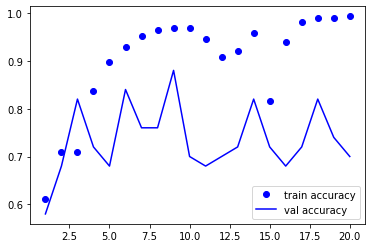

In [64]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

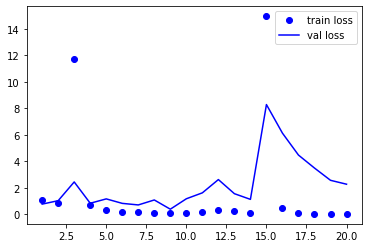

In [66]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

# 4th layer of convolution With Datagen Modifiers

In [17]:
kernel=(5,5)
model4 = models.Sequential()
model4.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(64, kernel, padding='same',input_shape=(150,150,3)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(128, kernel, padding='same',input_shape=(150,150,3)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(256, kernel, padding='same',input_shape=(150,150,3)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(6, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [18]:
history4 = model4.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 69s 113ms/step - loss: 1.1182 - categorical_accuracy: 0.5824 - val_loss: 0.8834 - val_categorical_accuracy: 0.7400
Epoch 2/20
600/600 [==============================] - 27s 45ms/step - loss: 24.6922 - categorical_accuracy: 0.6280 - val_loss: 0.5824 - val_categorical_accuracy: 0.8200
Epoch 3/20
600/600 [==============================] - 28s 46ms/step - loss: 0.6508 - categorical_accuracy: 0.7745 - val_loss: 0.4537 - val_categorical_accuracy: 0.8400
Epoch 4/20
600/600 [==============================] - 29s 49ms/step - loss: 0.5576 - categorical_accuracy: 0.8041 - val_loss: 0.4963 - val_categorical_accuracy: 0.8200
Epoch 5/20
600/600 [==============================] - 31s 51ms/step - loss: 0.5077 - categorical_accuracy: 0.8218 - val_loss: 0.7033 - val_categorical_accuracy: 0.8200
Epoch 6/20
600/600 [==============================] - 28s 46ms/step - loss: 0.4702 - categorical_accuracy: 0.8367 - val_loss: 0.7147 - val_categorical_accurac

In [19]:
acc=history4.history['categorical_accuracy']
val_acc=history4.history['val_categorical_accuracy']
loss=history4.history['loss']
val_loss=history4.history['val_loss']

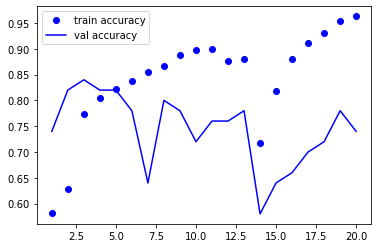

In [20]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

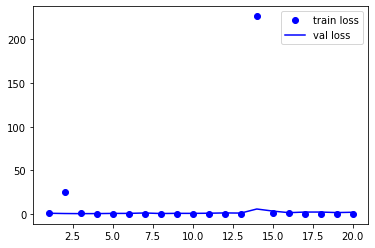

In [21]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

looking at the model with a fourth layer of convolution it seems that the extra layer did not help with accuarcy and the overfitting problem

# Model using A model with no convolutions

In [55]:
kernel=(5,5)
model5 = models.Sequential()

model5.add(layers.Flatten())
model5.add(layers.Dense(6, activation='softmax',input_shape=(150,150,3)))

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [56]:
history5 = model5.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 14s 22ms/step - loss: 6.2215 - categorical_accuracy: 0.3753 - val_loss: 5.3433 - val_categorical_accuracy: 0.3400
Epoch 2/20
600/600 [==============================] - 14s 23ms/step - loss: 4.5876 - categorical_accuracy: 0.4303 - val_loss: 3.0855 - val_categorical_accuracy: 0.4800
Epoch 3/20
600/600 [==============================] - 13s 22ms/step - loss: 4.2825 - categorical_accuracy: 0.4572 - val_loss: 4.3105 - val_categorical_accuracy: 0.5200
Epoch 4/20
600/600 [==============================] - 13s 22ms/step - loss: 4.2693 - categorical_accuracy: 0.4735 - val_loss: 6.3941 - val_categorical_accuracy: 0.2000
Epoch 5/20
600/600 [==============================] - 13s 21ms/step - loss: 4.5695 - categorical_accuracy: 0.4904 - val_loss: 4.6759 - val_categorical_accuracy: 0.4600
Epoch 6/20
600/600 [==============================] - 13s 21ms/step - loss: 3.9418 - categorical_accuracy: 0.5070 - val_loss: 4.3832 - val_categorical_accuracy:

In [62]:
acc=history5.history['categorical_accuracy']
val_acc=history5.history['val_categorical_accuracy']
loss=history5.history['loss']
val_loss=history5.history['val_loss']

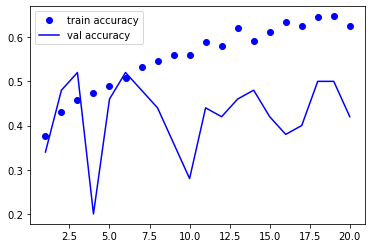

In [63]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

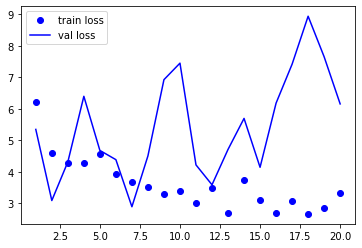

In [64]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

Overall The model without convolutions perfroms poorly

# Testing A one convolution model with dropout and relu

In [16]:
kernel=(5,5)
model6 = models.Sequential()
model6.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model6.add(layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(layers.Dropout(.2))
model6.add(layers.Flatten())
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dense(6, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [17]:
history6 = model6.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 1.4224 - categorical_accuracy: 0.4980 - val_loss: 1.1442 - val_categorical_accuracy: 0.5600
Epoch 2/20
600/600 [==============================] - 13s 22ms/step - loss: 1.0472 - categorical_accuracy: 0.5991 - val_loss: 1.1268 - val_categorical_accuracy: 0.6200
Epoch 3/20
600/600 [==============================] - 14s 23ms/step - loss: 0.8878 - categorical_accuracy: 0.6654 - val_loss: 1.0187 - val_categorical_accuracy: 0.5800
Epoch 4/20
600/600 [==============================] - 13s 22ms/step - loss: 0.7303 - categorical_accuracy: 0.7212 - val_loss: 1.1956 - val_categorical_accuracy: 0.6000
Epoch 5/20
600/600 [==============================] - 13s 22ms/step - loss: 0.6184 - categorical_accuracy: 0.7668 - val_loss: 0.9795 - val_categorical_accuracy: 0.5600
Epoch 6/20
600/600 [==============================] - 13s 22ms/step - loss: 0.5568 - categorical_accuracy: 0.7947 - val_loss: 1.2486 - val_categorical_accuracy:

In [19]:
acc=history6.history['categorical_accuracy']
val_acc=history6.history['val_categorical_accuracy']
loss=history6.history['loss']
val_loss=history6.history['val_loss']

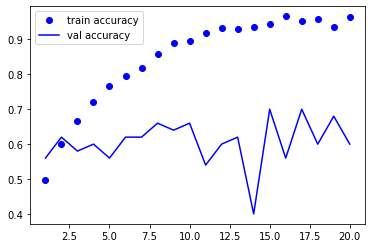

In [20]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

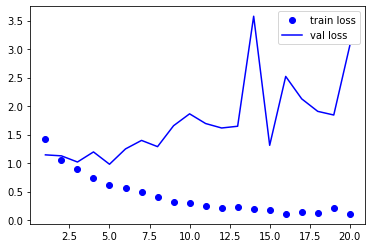

In [21]:
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

# Same model but with double the dropout rate

In [23]:
kernel=(5,5)
model7 = models.Sequential()
model7.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model7.add(layers.MaxPooling2D(pool_size=(2, 2)))
model7.add(layers.Dropout(.4))
model7.add(layers.Flatten())
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(6, activation='softmax'))

model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [24]:
history7 = model7.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 14s 22ms/step - loss: 1.3286 - categorical_accuracy: 0.5562 - val_loss: 0.9233 - val_categorical_accuracy: 0.6800
Epoch 2/20
600/600 [==============================] - 13s 22ms/step - loss: 0.9209 - categorical_accuracy: 0.6567 - val_loss: 1.1916 - val_categorical_accuracy: 0.5800
Epoch 3/20
600/600 [==============================] - 13s 21ms/step - loss: 0.8432 - categorical_accuracy: 0.6948 - val_loss: 0.8598 - val_categorical_accuracy: 0.6800
Epoch 4/20
600/600 [==============================] - 13s 22ms/step - loss: 0.6204 - categorical_accuracy: 0.7773 - val_loss: 1.4156 - val_categorical_accuracy: 0.6000
Epoch 5/20
600/600 [==============================] - 13s 22ms/step - loss: 0.4844 - categorical_accuracy: 0.8285 - val_loss: 1.2087 - val_categorical_accuracy: 0.6400
Epoch 6/20
600/600 [==============================] - 13s 22ms/step - loss: 0.3929 - categorical_accuracy: 0.8674 - val_loss: 1.0081 - val_categorical_accuracy:

In [28]:
acc=history7.history['categorical_accuracy']
val_acc=history7.history['val_categorical_accuracy']
loss=history7.history['loss']
val_loss=history7.history['val_loss']

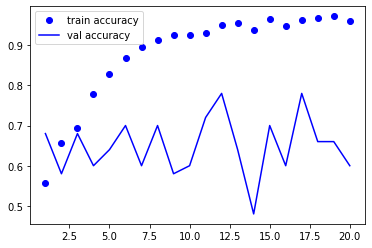

In [29]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

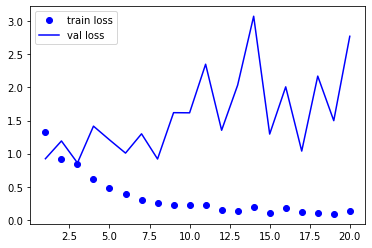

In [30]:
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

It Does not seem that double the dropout rate changed the results signifigantly

# Trying a model with Relu Activation on the Convultion

In [35]:
kernel=(5,5)
model8 = models.Sequential()
model8.add(layers.Conv2D(32, kernel,activation="relu", padding='same',input_shape=(150,150,3)))
model8.add(layers.MaxPooling2D(pool_size=(2, 2)))
model8.add(layers.Dropout(.2))
model8.add(layers.Flatten())
model8.add(layers.Dense(64, activation='relu'))
model8.add(layers.Dense(6, activation='softmax'))

model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [36]:
history8 = model8.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 14s 22ms/step - loss: 1.0860 - categorical_accuracy: 0.6073 - val_loss: 0.5579 - val_categorical_accuracy: 0.7800
Epoch 2/20
600/600 [==============================] - 13s 21ms/step - loss: 0.7273 - categorical_accuracy: 0.7411 - val_loss: 0.7646 - val_categorical_accuracy: 0.7000
Epoch 3/20
600/600 [==============================] - 13s 21ms/step - loss: 0.4656 - categorical_accuracy: 0.8393 - val_loss: 0.9132 - val_categorical_accuracy: 0.6800
Epoch 4/20
600/600 [==============================] - 13s 21ms/step - loss: 0.2792 - categorical_accuracy: 0.9070 - val_loss: 0.8150 - val_categorical_accuracy: 0.6200
Epoch 5/20
600/600 [==============================] - 13s 21ms/step - loss: 0.1604 - categorical_accuracy: 0.9505 - val_loss: 0.7620 - val_categorical_accuracy: 0.8200
Epoch 6/20
600/600 [==============================] - 13s 22ms/step - loss: 0.1080 - categorical_accuracy: 0.9692 - val_loss: 0.8287 - val_categorical_accuracy:

In [38]:
acc=history8.history['categorical_accuracy']
val_acc=history8.history['val_categorical_accuracy']
loss=history8.history['loss']
val_loss=history8.history['val_loss']

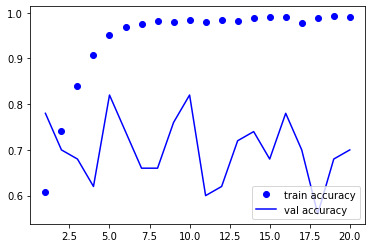

In [39]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

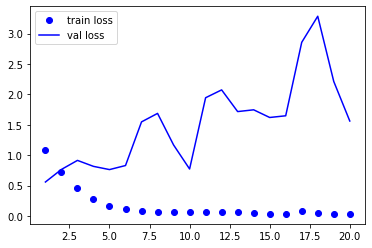

In [40]:
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

In [50]:
kernel=(5,5)
model9 = models.Sequential()
model9.add(layers.Conv2D(32, kernel,activation="relu", padding='same',input_shape=(150,150,3)))
model9.add(layers.MaxPooling2D(pool_size=(2, 2)))
model9.add(layers.Dropout(.2))
model9.add(layers.Flatten())
model9.add(layers.Dense(64, activation='relu'))
model9.add(layers.Dense(6, activation='softmax'))

model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [51]:
history9 = model9.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 15s 23ms/step - loss: 1.1369 - categorical_accuracy: 0.5919 - val_loss: 0.9543 - val_categorical_accuracy: 0.6400
Epoch 2/20
600/600 [==============================] - 14s 23ms/step - loss: 0.5862 - categorical_accuracy: 0.7916 - val_loss: 0.8337 - val_categorical_accuracy: 0.7600
Epoch 3/20
600/600 [==============================] - 14s 23ms/step - loss: 0.3041 - categorical_accuracy: 0.8991 - val_loss: 1.1419 - val_categorical_accuracy: 0.6600
Epoch 4/20
600/600 [==============================] - 13s 22ms/step - loss: 0.1520 - categorical_accuracy: 0.9544 - val_loss: 1.0827 - val_categorical_accuracy: 0.7000
Epoch 5/20
600/600 [==============================] - 14s 24ms/step - loss: 0.1028 - categorical_accuracy: 0.9694 - val_loss: 1.9954 - val_categorical_accuracy: 0.6400
Epoch 6/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0847 - categorical_accuracy: 0.9753 - val_loss: 1.3060 - val_categorical_accuracy:

Just by looking at the accuracy difference between traininig and validation it is still evident that overfitting is present

In [59]:
kernel=(5,5)
model10 = models.Sequential()
model10.add(layers.Conv2D(32, kernel, padding='same',input_shape=(150,150,3)))
model10.add(layers.Dropout(.1))
model10.add(layers.MaxPooling2D(pool_size=(2, 2)))
model10.add(layers.Conv2D(64, kernel, padding='same',input_shape=(150,150,3)))
model10.add(layers.Dropout(.1))
model10.add(layers.MaxPooling2D(pool_size=(2, 2)))
model10.add(layers.Conv2D(128, kernel, padding='same',input_shape=(150,150,3)))
model10.add(layers.Dropout(.1))
model10.add(layers.MaxPooling2D(pool_size=(2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(6, activation='softmax'))

model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [60]:
history10 = model10.fit(train_gen,
                
                     epochs=20,
                     steps_per_epoch=600,
                    validation_data=valid_gen,
                    validation_steps=10
                    )

Epoch 1/20
600/600 [==============================] - 30s 49ms/step - loss: 1.0567 - categorical_accuracy: 0.6109 - val_loss: 1.2193 - val_categorical_accuracy: 0.5800
Epoch 2/20
600/600 [==============================] - 27s 45ms/step - loss: 0.8402 - categorical_accuracy: 0.7000 - val_loss: 0.8552 - val_categorical_accuracy: 0.7200
Epoch 3/20
600/600 [==============================] - 28s 46ms/step - loss: 0.6647 - categorical_accuracy: 0.7724 - val_loss: 1.1180 - val_categorical_accuracy: 0.7000
Epoch 4/20
600/600 [==============================] - 27s 45ms/step - loss: 0.7281 - categorical_accuracy: 0.7770 - val_loss: 0.9335 - val_categorical_accuracy: 0.7200
Epoch 5/20
600/600 [==============================] - 27s 45ms/step - loss: 0.4893 - categorical_accuracy: 0.8459 - val_loss: 2.8526 - val_categorical_accuracy: 0.4800
Epoch 6/20
600/600 [==============================] - 26s 43ms/step - loss: 1.0955 - categorical_accuracy: 0.7897 - val_loss: 3.3543 - val_categorical_accuracy:

After adding dropout to the three convolutuion model which did the best it seems that dropout did not improve the model